# Walmart Data Understanding


In [107]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
df = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
df = df.merge(stores, how="left", on="Store")

print(df.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0      1     1  2010-02-05      24924.50      False    A  151315
1      1     1  2010-02-12      46039.49       True    A  151315
2      1     1  2010-02-19      41595.55      False    A  151315
3      1     1  2010-02-26      19403.54      False    A  151315
4      1     1  2010-03-05      21827.90      False    A  151315


In [109]:
print(len(df))

421570


### df_department_store

In [110]:
df.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

In [117]:
dept = 1
store = 1
filename = "dept-{}-store-{}.jpg".format(dept,store)

In [112]:
dfx = df[df.Dept == dept]
dfx = dfx[dfx.Store == store].Weekly_Sales
dfx = dfx.apply(lambda x: math.log(x,10))
print(dfx.head())

0    4.396626
1    4.663131
2    4.619047
3    4.287881
4    4.339012
Name: Weekly_Sales, dtype: float64


In [119]:
dfx_frame = dfx.to_frame(name = "log(Weekly_Sales)")
print(dfx_frame.head())

   log(Weekly_Sales)
0           4.396626
1           4.663131
2           4.619047
3           4.287881
4           4.339012


In [120]:
# dfx_frame["Day_index"] = dfx_frame.index
dfx_frame.reset_index(inplace = True)
print(dfx_frame.head())

   index  log(Weekly_Sales)
0      0           4.396626
1      1           4.663131
2      2           4.619047
3      3           4.287881
4      4           4.339012


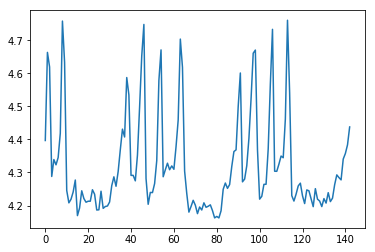

In [150]:
ax = dfx.plot()
fig = ax.get_figure()
fig.savefig(os.path.join("visualizations","line",filename))

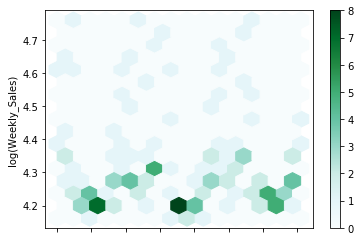

In [151]:
ax = dfx_frame.plot.hexbin(x = "index", y = "log(Weekly_Sales)", gridsize = 15)
fig = ax.get_figure()
fig.savefig(os.path.join("visualizations","scatter",filename))

In [116]:
print(len(df))

421570
